In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### ETL

In [7]:
df = pd.read_excel(r"C:/Users/ASUS/Desktop/AI&ML/Data_Set/HMS_Insurance_Claims_Classification.xlsx")
df.head()

,Claim_ID,Patient_Age,Gender,Pre_existing_Conditions,Claim_Type,Claim_Amount,Hospital_Type,Treatment_Started,Hospital_Stay_Duration,Insurance_Coverage,Payment_Method,Previous_Claims,Claim_Date,Claim_Status
0,Claim_1,35,Female,False,Surgery,46826.67,Public,True,14,77.45,Cash,0,2021-11-14,0
1,Claim_2,44,Female,True,Hospital Stay,16222.06,Private,False,1,94.98,Credit Card,4,2024-10-02,0
2,Claim_3,79,Female,False,Surgery,45993.83,Private,True,10,70.57,Cash,0,2023-08-29,0
3,Claim_4,83,Male,True,Routine Checkup,47945.94,Private,False,17,99.93,Credit Card,2,2022-12-29,0
4,Claim_5,58,Male,False,Hospital Stay,36170.22,Private,True,16,68.55,Cash,5,2020-10-11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim_ID                 5000 non-null   object 
 1   Patient_Age              5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Pre_existing_Conditions  5000 non-null   bool   
 4   Claim_Type               5000 non-null   object 
 5   Claim_Amount             5000 non-null   float64
 6   Hospital_Type            5000 non-null   object 
 7   Treatment_Started        5000 non-null   bool   
 8   Hospital_Stay_Duration   5000 non-null   int64  
 9   Insurance_Coverage       5000 non-null   float64
 10  Payment_Method           5000 non-null   object 
 11  Previous_Claims          5000 non-null   int64  
 12  Claim_Date               5000 non-null   object 
 13  Claim_Status             5000 non-null   int64  
dtypes: bool(2), float64(2), 

In [7]:
df.describe()

,Patient_Age,Claim_Amount,Hospital_Stay_Duration,Insurance_Coverage,Previous_Claims,Claim_Status
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,51.886000,25465.357442,10.43200,75.315720,2.496800,0.368800
std,19.484705,14273.320919,5.71499,14.514541,1.705336,0.482528
min,18.000000,1030.290000,1.00000,50.000000,0.000000,0.000000
25%,35.000000,13049.502500,6.00000,62.810000,1.000000,0.000000
50%,52.000000,25653.955000,10.00000,75.835000,3.000000,0.000000
75%,69.000000,37698.280000,15.00000,87.890000,4.000000,1.000000
max,85.000000,49998.860000,20.00000,99.990000,5.000000,1.000000


In [9]:
df.shape

(5000, 14)

In [11]:
df.columns

Index(['Claim_ID', 'Patient_Age', 'Gender', 'Pre_existing_Conditions',
       'Claim_Type', 'Claim_Amount', 'Hospital_Type', 'Treatment_Started',
       'Hospital_Stay_Duration', 'Insurance_Coverage', 'Payment_Method',
       'Previous_Claims', 'Claim_Date', 'Claim_Status'],
      dtype='object')

In [15]:
df.dtypes

Claim_ID                    object
Patient_Age                  int64
Gender                      object
Pre_existing_Conditions       bool
Claim_Type                  object
Claim_Amount               float64
Hospital_Type               object
Treatment_Started             bool
Hospital_Stay_Duration       int64
Insurance_Coverage         float64
Payment_Method              object
Previous_Claims              int64
Claim_Date                  object
Claim_Status                 int64
dtype: object

In [17]:
df.isnull().sum()

Claim_ID                   0
Patient_Age                0
Gender                     0
Pre_existing_Conditions    0
Claim_Type                 0
Claim_Amount               0
Hospital_Type              0
Treatment_Started          0
Hospital_Stay_Duration     0
Insurance_Coverage         0
Payment_Method             0
Previous_Claims            0
Claim_Date                 0
Claim_Status               0
dtype: int64

In [19]:
df.nunique()

Claim_ID                   5000
Patient_Age                  68
Gender                        2
Pre_existing_Conditions       2
Claim_Type                    4
Claim_Amount               4998
Hospital_Type                 2
Treatment_Started             2
Hospital_Stay_Duration       20
Insurance_Coverage         3168
Payment_Method                3
Previous_Claims               6
Claim_Date                 1697
Claim_Status                  2
dtype: int64

### EDA

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2561409198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Claim_Status", data=df, palette="viridis")


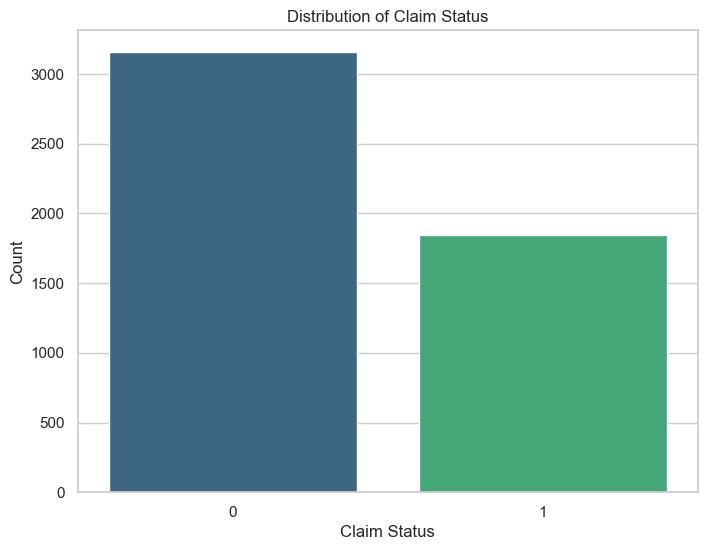

In [23]:
# Set plot style
sns.set(style="whitegrid")

# Count Plot for Target Variable (Claim_Status)
plt.figure(figsize=(8, 6))
sns.countplot(x="Claim_Status", data=df, palette="viridis")
plt.title("Distribution of Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("Count")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2132843312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


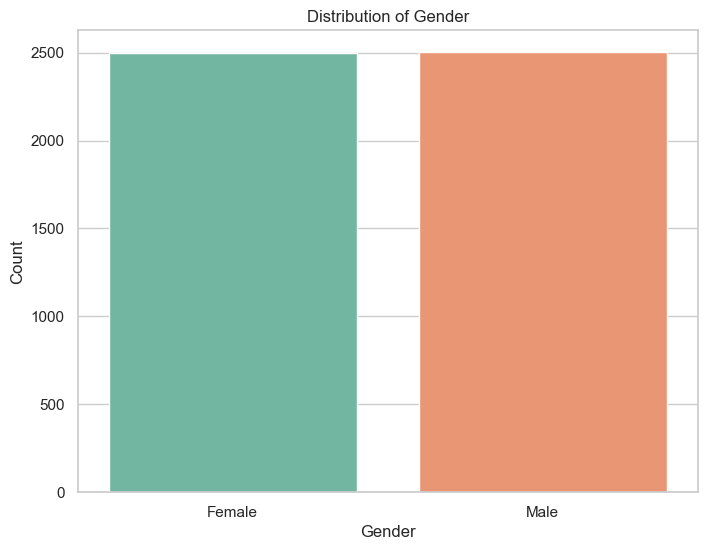

In [25]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


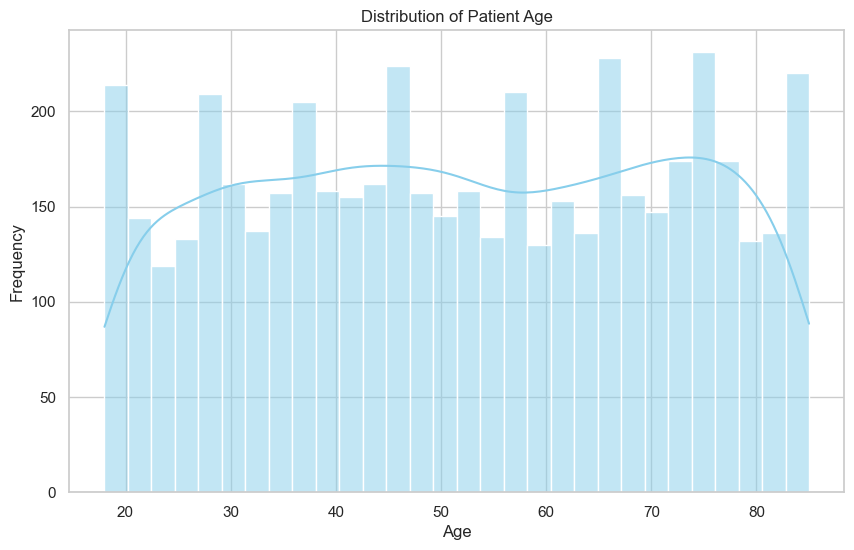

In [29]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Patient_Age"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

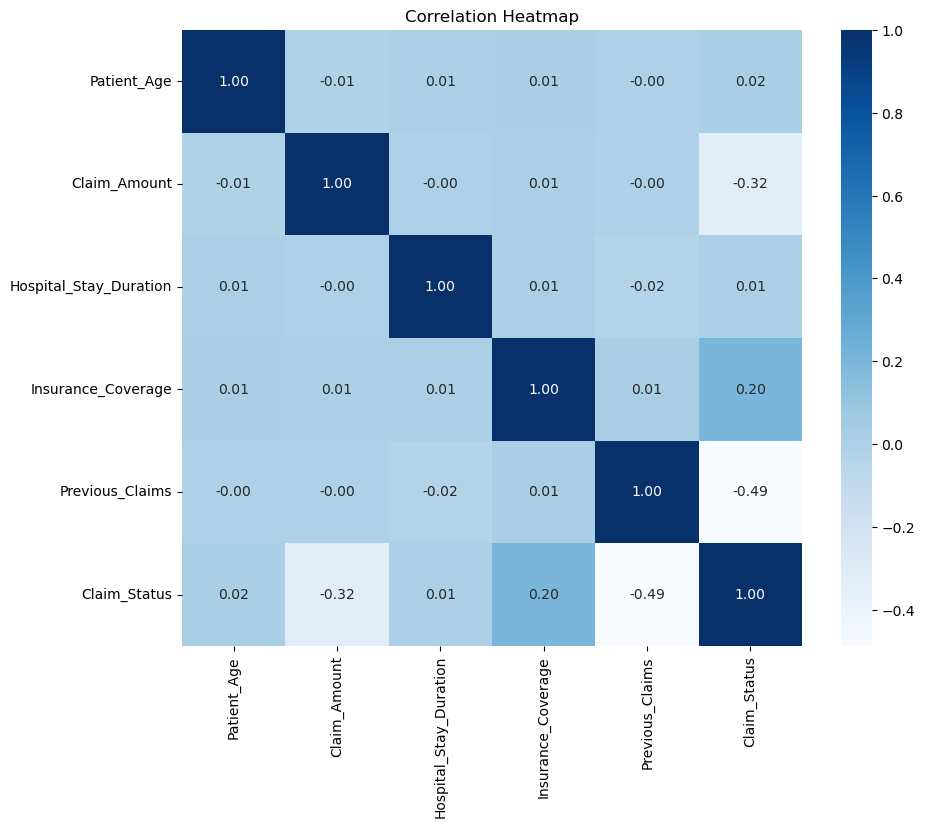

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Feature Engineering

In [39]:
# Encoding Categorical Variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns = ["Gender", "Pre_existing_Conditions", "Claim_Type", "Hospital_Type", "Treatment_Started", "Payment_Method"]

for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])
# Display Dataset after Encoding
df.head()

,Claim_ID,Patient_Age,Gender,Pre_existing_Conditions,Claim_Type,Claim_Amount,Hospital_Type,Treatment_Started,Hospital_Stay_Duration,Insurance_Coverage,Payment_Method,Previous_Claims,Claim_Date,Claim_Status
0,Claim_1,35,0,0,3,46826.67,1,1,14,77.45,1,0,2021-11-14,0
1,Claim_2,44,0,1,1,16222.06,0,0,1,94.98,2,4,2024-10-02,0
2,Claim_3,79,0,0,3,45993.83,0,1,10,70.57,1,0,2023-08-29,0
3,Claim_4,83,1,1,2,47945.94,0,0,17,99.93,2,2,2022-12-29,0
4,Claim_5,58,1,0,1,36170.22,0,1,16,68.55,1,5,2020-10-11,0


### Model Building

In [45]:
# Splitting Dataset into Features and Target Variable
X = df.drop(["Claim_ID", "Claim_Status", "Claim_Date"], axis=1)  # Features
y = df["Claim_Status"]  # Target Variable

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

# Display First 5 Rows of Features
print("\nFeatures (X):")
X.head()

Shape of Features (X): (5000, 11)
Shape of Target (y): (5000,)

Features (X):


,Patient_Age,Gender,Pre_existing_Conditions,Claim_Type,Claim_Amount,Hospital_Type,Treatment_Started,Hospital_Stay_Duration,Insurance_Coverage,Payment_Method,Previous_Claims
0,35,0,0,3,46826.67,1,1,14,77.45,1,0
1,44,0,1,1,16222.06,0,0,1,94.98,2,4
2,79,0,0,3,45993.83,0,1,10,70.57,1,0
3,83,1,1,2,47945.94,0,0,17,99.93,2,2
4,58,1,0,1,36170.22,0,1,16,68.55,1,5


In [47]:
# Display First 5 Rows of Target
print("\nTarget (y):")
y.head()


Target (y):


0    0
1    0
2    0
3    0
4    0
Name: Claim_Status, dtype: int64

### Repeat Feature Engineering

In [49]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Columns
categorical_cols = ["Gender", "Pre_existing_Conditions", "Claim_Type", "Hospital_Type", "Treatment_Started", "Payment_Method"]

label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

print("Categorical Features After Encoding:")
print(X[categorical_cols].head())


Categorical Features After Encoding:
   Gender  Pre_existing_Conditions  Claim_Type  Hospital_Type  \
0       0                        0           3              1   
1       0                        1           1              0   
2       0                        0           3              0   
3       1                        1           2              0   
4       1                        0           1              0   

   Treatment_Started  Payment_Method  
0                  1               1  
1                  0               2  
2                  1               1  
3                  0               2  
4                  1               1  


In [51]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (4000, 11)
Testing Set Shape: (1000, 11)


In [53]:
from sklearn.preprocessing import StandardScaler

# Applying Standard Scaling on Training and Testing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("After Scaling - Training Set:")
print(X_train[:5])

print("\nAfter Scaling - Testing Set:")
print(X_test[:5])


After Scaling - Training Set:
[[-0.13581824 -1.00250313 -1.01359237 -1.33336347 -0.91027225 -1.01511421
  -0.973842   -1.66443457 -1.18144836 -1.19268014  0.30345105]
 [ 1.0974915  -1.00250313 -1.01359237 -0.43998761  0.93369916 -1.01511421
  -0.973842    1.32212243 -1.01661739  0.03625354 -1.45738676]
 [-1.72884332  0.99750312  0.98658991  0.45338825  1.33689029  0.98511083
   1.02686062 -0.78603545 -0.57040135  0.03625354  1.47734292]
 [ 1.55998266  0.99750312  0.98658991  0.45338825  1.03507017 -1.01511421
   1.02686062 -1.31307492 -1.00420335 -1.19268014 -1.45738676]
 [ 1.14887941  0.99750312 -1.01359237  1.34676411 -0.16625411 -1.01511421
   1.02686062  0.61940314 -1.40007353 -1.19268014 -1.45738676]]

After Scaling - Testing Set:
[[ 1.25165522 -1.00250313 -1.01359237 -0.43998761  1.0570887   0.98511083
   1.02686062  0.09236367  0.51927616  0.03625354  0.30345105]
 [ 1.20026732 -1.00250313  0.98658991 -0.43998761  0.52176104  0.98511083
  -0.973842    1.67348208 -0.94558145 -1.19

### Model Evalution

 Model Accuracy: 0.95

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       633
           1       0.90      0.97      0.93       367

    accuracy                           0.95      1000
   macro avg       0.94      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



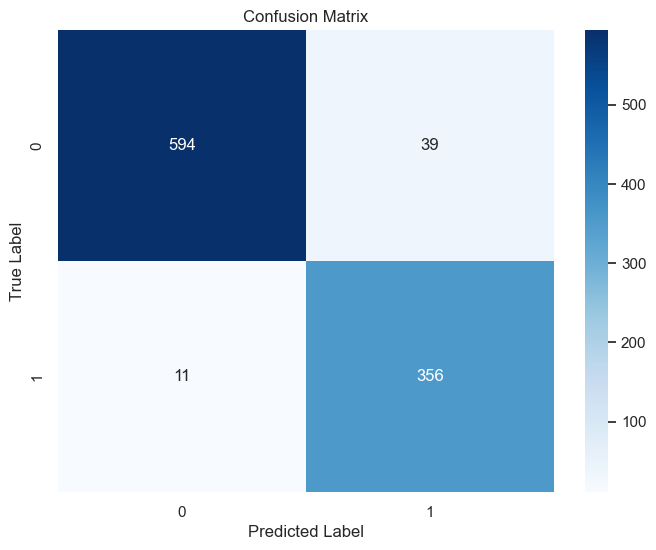

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(" Model Accuracy:", accuracy)

# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


ROC-AUC Score: 0.9542079367744103


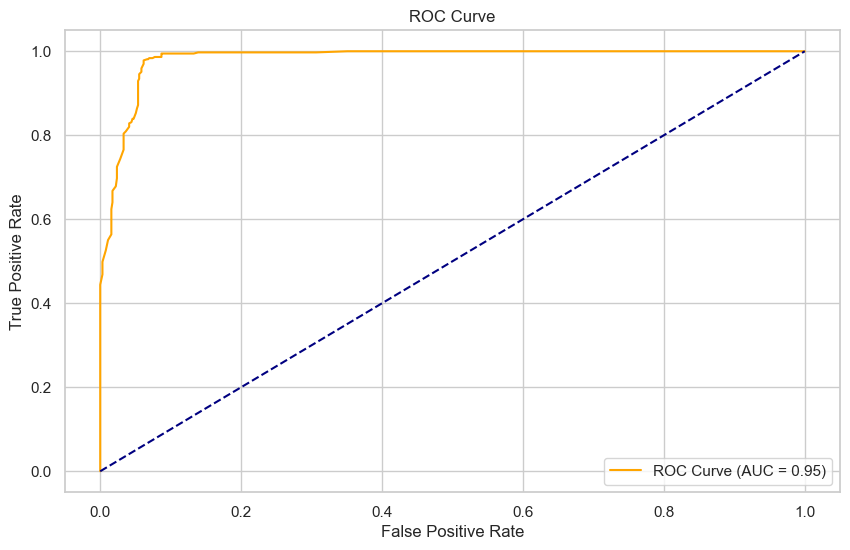

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC-AUC Score
auc_score = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2761148225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=X.columns, palette="viridis")


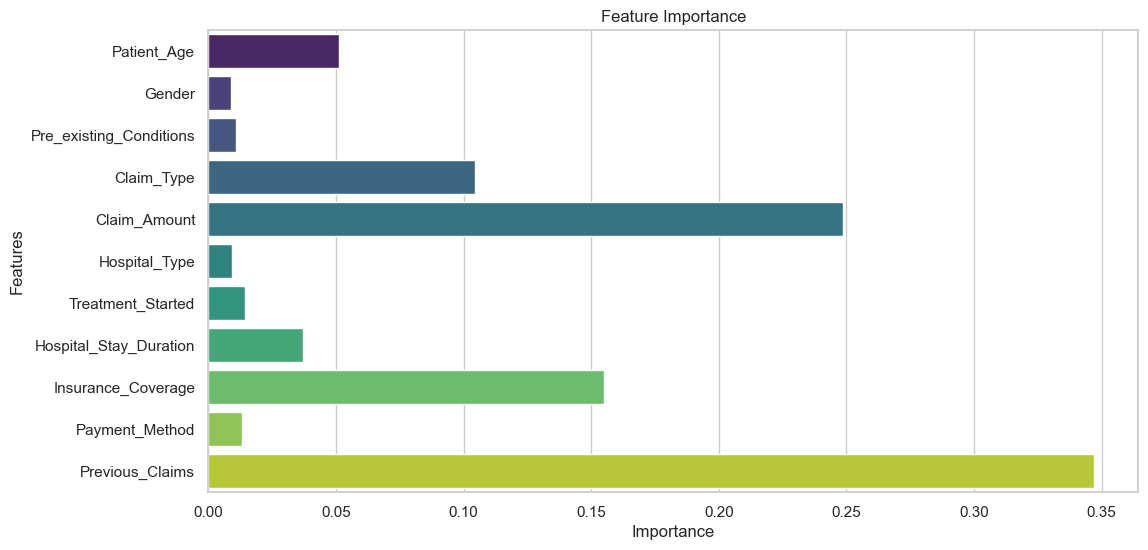

In [61]:
# Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=model.feature_importances_, y=X.columns, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV

# Defining Parameters for Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV Implementation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_

# Accuracy of Best Model
best_accuracy = best_model.score(X_test, y_test)
print("Best Model Accuracy:", best_accuracy)


Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}
Best Model Accuracy: 0.947


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Metrics
Accuracy: 0.812
Precision: 0.7753846153846153
Recall: 0.6866485013623979
F1 Score: 0.7283236994219653
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       633
           1       0.78      0.69      0.73       367

    accuracy                           0.81      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.81      0.81      0.81      1000



In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

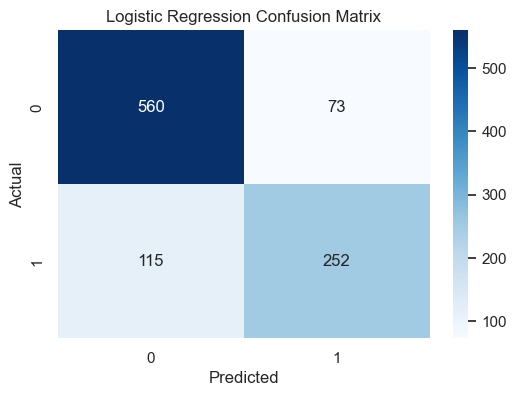

In [75]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


 Decision Tree Classifier Metrics
Accuracy: 0.954
Precision: 0.9302949061662198
Recall: 0.9455040871934605
F1 Score: 0.9378378378378378
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       633
           1       0.93      0.95      0.94       367

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



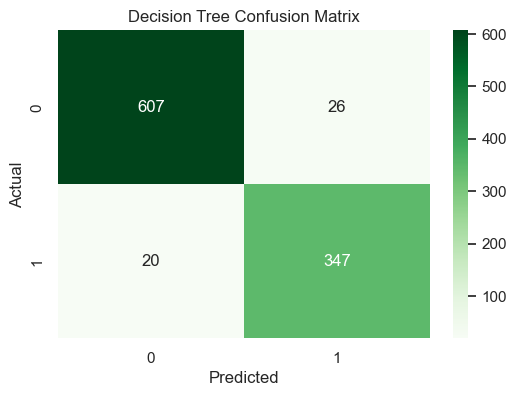

In [81]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [83]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Metrics
Accuracy: 0.952
Precision: 0.899749373433584
Recall: 0.9782016348773842
F1 Score: 0.9373368146214099
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       633
           1       0.90      0.98      0.94       367

    accuracy                           0.95      1000
   macro avg       0.94      0.96      0.95      1000
weighted avg       0.95      0.95      0.95      1000



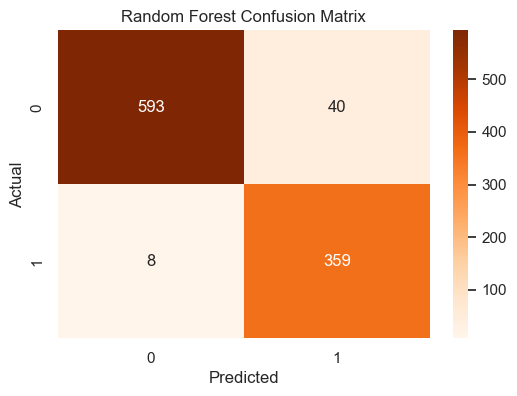

In [85]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()